In [1]:
import numpy as np
from qutip import*
import time
import matplotlib.pyplot as plt
import itertools as it
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
                
Nqubits= 3
Nlevels= 3
Paulis_gt = 4.00e-8
CZ_gt = 2.83e-7
gate_time_CCZS = CZ_gt/(sqrt(2))
Diss = [27.35e-6, 39.73e-6, 34.73e-6]
Alpha = -2*pi*200e6
ZZ_list = [[0,1]]
ZZ_strength = [0*2*pi*100e3]

In [2]:
def to2levels(dm):
    '''
    This function returns the density matrix in the computational subspace.
    
    Arguments-
    dm          :      Density matrix in the total Hilbert space
    
    Returns-
    Prob_array  :      Array of probabilities in the computational space
    
    '''


    levels= list(map(",".join, it.product(*[map(str, range(Nlevels))])))
    states = ["".join(seq) for seq in it.product(levels, repeat=Nqubits)]
    Prob_array = []
    counter = 0
    for i in states:
        if '2' not in i:
            Prob_array.append(dm[counter, counter])
        counter = counter + 1
    
    Prob_array = np.array(Prob_array)
    norm = 1/np.sum(Prob_array)
    return Prob_array

In [3]:
T1s = [27.35e-6, 39.73e-6, 34.73e-6]
T2s = [45.21e-6, 57.67e-6, 21.49e-6]

Deph = []
for i in range(3):
    _1byT2 = 1/T2s[i]
    _1byT1 = 1/(2*T1s[i])
    Deph.append(1/(_1byT2 - _1byT1))

In [4]:
# Import the developed package
import Chalmers_Simulator_mesolve as CS

The quantum gates which are modelled in this code and their notations-
--------------------------------------------------------------------------------
Pauli X 		 PX
Pauli Y 		 PY
Pauli Z 		 PZ
Hadamard 		 HD


Controlled Z 		 CZ 		 Format:Tar_Con=[[control, target]]
Controlled CZS 		 CCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]


In [5]:
# Create Hamiltonian and collapse operators
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

In [6]:
gate=[]
gate.append(Add_gate(name=["PY" , "PY"], Tar_Con=[0,1],   angle=[pi/2, pi/2]           ))
gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,1]], angle=[0]               ))
gate.append(Add_gate(name=["PY"       ], Tar_Con=[2],     angle=[pi/2]           ))
gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,2]], angle=[0]               ))
gate.append(Add_gate(name=["PY" , "PY"], Tar_Con=[1,2],   angle=[-pi/2, -pi/2]           ))
gate.append(Add_gate(name=["PZ"], Tar_Con=[0],   angle=[pi]           ))


Ini = tensor(basis(3,0), basis(3,0), basis(3,0))

fstate = CS.Execute(Hamiltonian, c_ops, gate, Ini)    

In [7]:
fstate.diag()

array([4.95680086e-01, 2.82996756e-03, 1.84739331e-03, 6.66998718e-03,
       2.80124237e-03, 8.90257565e-05, 1.53482447e-03, 2.95965535e-05,
       6.19804417e-06, 1.78093860e-05, 3.10980252e-03, 6.18205428e-05,
       2.63811327e-03, 4.66102944e-01, 9.26447229e-03, 1.67675997e-05,
       3.31874665e-03, 6.61866086e-05, 1.44665222e-06, 7.36915470e-05,
       1.19673179e-07, 1.75717156e-04, 3.60915434e-03, 6.55783894e-06,
       6.57161671e-07, 4.75941362e-05, 7.71300638e-08])

In [8]:

fstate2 = ket2dm(Qobj(to2levels(fstate)))
print(fstate2)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[2.45698747e-01 1.40275856e-03 3.30617982e-03 1.38852006e-03
  8.82775800e-06 1.54146718e-03 1.30766021e-03 2.31037948e-01]
 [1.40275856e-03 8.00871637e-06 1.88758473e-05 7.92742502e-06
  5.03999846e-08 8.80064023e-06 7.46577497e-06 1.31905621e-03]
 [3.30617982e-03 1.88758473e-05 4.44887290e-05 1.86842507e-05
  1.18788377e-07 2.07423429e-05 1.75961817e-05 3.10890066e-03]
 [1.38852006e-03 7.92742502e-06 1.86842507e-05 7.84695881e-06
  4.98884067e-08 8.71131057e-06 7.38999468e-06 1.30566732e-03]
 [8.82775800e-06 5.03999846e-08 1.18788377e-07 4.98884067e-08
  3.17174231e-10 5.53836735e-08 4.69831777e-08 8.30100727e-06]
 [1.54146718e-03 8.80064023e-06 2.07423429e-05 8.71131057e-06
  5.53836735e-08 9.67087170e-06 8.20401130e-06 1.44948811e-03]
 [1.30766021e-03 7.46577497e-06 1.75961817e-05 7.38999468e-06
  4.69831777e-08 8.20401130e-06 6.95964165e-06 1.22963236e-03]
 [2.31037948e-01 1.31905621e-03 3.1

0.998889098916518


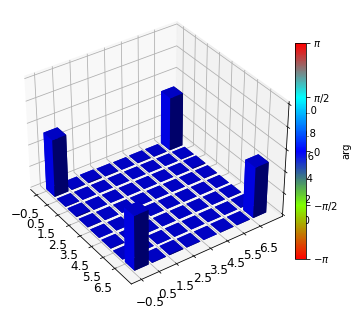

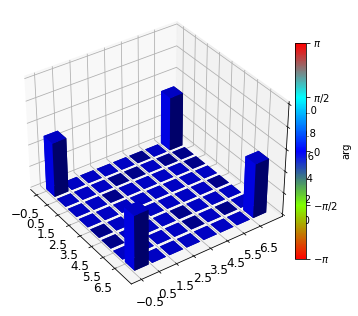

In [17]:
visualization.matrix_histogram_complex(fstate2)
GHZ = tensor([basis(2,0)]*3) + tensor([basis(2,1)]*3)
GHZ = GHZ.unit()

rho_GHZ = ket2dm(GHZ)
visualization.matrix_histogram_complex(rho_GHZ)
fstate2.dims = rho_GHZ.dims
print(fidelity(fstate2, rho_GHZ)**2)

In [10]:
GHZ

Quantum object: dims = [[3, 3, 3], [1, 1, 1]], shape = (27, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [11]:
1/sqrt(2)

0.7071067811865475

In [28]:
gate=[]
# gate.append(Add_gate(name=["HD", "PX"], Tar_Con=[0, 1],      angle=[pi/2, pi/2]              ))
gate.append(Add_gate(name=["CCZS"    ], Tar_Con=[[0,1,2,0]], angle=[0]        ))
# gate.append(Add_gate(name=["PX"      ], Tar_Con=[1],         angle=[pi/2]           ))



Ini = tensor(basis(3,1), basis(3,1), basis(3,1)).unit()

fstate = CS.Execute(Hamiltonian, [] , gate, Ini) 
Qobj(to2levels(fstate*fstate.dag()))

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.99999836]]

In [29]:
Qobj(to2levels(Ini*Ini.dag()))

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [20]:
fstate.diag()

array([2.58881776e-07, 2.54870053e-05, 0.00000000e+00, 2.68046410e-05,
       3.60443893e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.99683775e-05, 4.88465582e-03, 0.00000000e+00,
       4.88241493e-03, 9.78033605e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39921351e-03, 1.53657473e-03,
       0.00000000e+00, 1.53657776e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [7]:
GHZ = tensor([basis(3,0)]*3) + tensor([basis(3,1)]*3)
GHZ = GHZ.unit()
fidelity(GHZ, fstate)

0.21841938280541476

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[2.14382531e-03-3.01060414e-18j]
 [4.20512220e-04-3.03569798e-19j]
 [4.91708072e-01+4.92368830e-18j]
 [4.89003820e-04-2.81209372e-19j]
 [1.24731248e-01-3.04596226e-17j]
 [1.20533346e-01-6.14470558e-17j]
 [1.19858041e-01+1.24613524e-16j]
 [1.18452948e-01-5.27189479e-17j]]